In [1]:
# Import libraries and load data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

df = pd.read_csv('./data/raw/kc_house_data.csv')

In [2]:
# Extract zipcode from address string using regex
df['zipcode'] = df.address.str.extract('[\w \-.]+, [\w \-.]+, [\w \-.]+ (\d{5})').astype('int64')

In [3]:
# List of zipcodes in King County, WA
# https://www.zillow.com/browse/homes/wa/king-county/

kc_zipcodes = [98052,98115,98103,98092,98042,98023,98105,98003,98034,98118,98133,98058,98125,
               98031,98122,98033,98006,98032,98030,98004,98001,98059,98117,98056,98198,98168,
               98155,98027,98109,98002,98038,98144,98146,98074,98119,98007,98040,98029,98107,
               98011,98108,98072,98106,98178,98116,98112,98008,98053,98028,98126,98188,98102,
               98055,98075,98177,98022,98166,98199,98005,98121,98136,98045,98057,98019,98104,
               98077,98101,98065,98148,98070,98014,98354,98024,98051,98010,98047,98251,98134,
               98039,98195,98158,98068,98256,98288,98050,98132,98171,98184,98054,98009,98013,
               98015,98025,98035,98041,98062,98064,98063,98071,98073,98083,98089,98093,98111,
               98113,98114,98124,98127,98131,98129,98139,98138,98141,98145,98151,98154,98160,
               98164,98161,98165,98170,98174,98175,98181,98185,98190,98194,98191,98224,98471,98481]

In [4]:
# Drop values not in King County, drop duplicated rows
df = df.loc[df.zipcode.isin(kc_zipcodes)].copy()
df.drop_duplicates(inplace = True)

In [5]:
# Convert date column to datetime objects
df.date = pd.to_datetime(df.date)

In [6]:
# Notice that certain addresses have multiple records
df.address.value_counts()

Delridge Way Southwest, Seattle, Washington 98106, United States                       24
Interlake Avenue North, Seattle, Washington 98103, United States                       11
Northeast 201st Street, Woodinville, Washington 98072, United States                   11
26th Avenue, Seattle, Washington 98122, United States                                   9
12006 31st Ave NE, Seattle, Washington 98125, United States                             7
                                                                                       ..
512 Northwest 60th Street, Seattle, Washington 98107, United States                     1
20303 90th Place South, Kent, Washington 98031, United States                           1
1813 290th Avenue Northeast, Carnation, Washington 98014, United States                 1
466 Grandey Way Northeast, Renton, Washington 98056, United States                      1
28207 Southeast Issaquah Fall City Road, Fall City, Washington 98024, United States     1
Name: addr

In [7]:
# Extra records are a mess, multiple conflicting reports of sales price and other characteristics
df.loc[df.address == 'Delridge Way Southwest, Seattle, Washington 98106, United States'].sort_values('date')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zipcode
4057,1773100545,2021-06-11,629000.0,3,2.5,1580,920,3.0,NO,NO,...,1580,0,0,450,2015,0,"Delridge Way Southwest, Seattle, Washington 98...",47.54391,-122.36055,98106
5297,880000205,2021-07-09,399999.0,3,2.0,1260,1125,2.0,NO,NO,...,810,450,0,60,2011,0,"Delridge Way Southwest, Seattle, Washington 98...",47.54391,-122.36055,98106
7604,9485700178,2021-07-23,535000.0,3,2.0,1060,678,3.0,NO,NO,...,1060,0,0,300,2021,0,"Delridge Way Southwest, Seattle, Washington 98...",47.54391,-122.36055,98106
11873,9485700182,2021-07-23,515000.0,3,2.0,1120,792,2.0,NO,NO,...,740,380,0,300,2021,0,"Delridge Way Southwest, Seattle, Washington 98...",47.54391,-122.36055,98106
20934,9485700186,2021-07-23,525000.0,3,2.0,1070,1235,2.0,NO,NO,...,680,390,0,300,2021,0,"Delridge Way Southwest, Seattle, Washington 98...",47.54391,-122.36055,98106
6905,1773100986,2021-07-27,645000.0,3,2.5,1640,1331,3.0,NO,NO,...,1530,350,240,0,2010,0,"Delridge Way Southwest, Seattle, Washington 98...",47.54391,-122.36055,98106
9359,9485700184,2021-07-28,525000.0,3,2.0,1060,678,3.0,NO,NO,...,1060,0,0,300,2021,0,"Delridge Way Southwest, Seattle, Washington 98...",47.54391,-122.36055,98106
26157,9485700177,2021-08-04,525000.0,3,2.5,1070,1232,2.0,NO,NO,...,680,390,0,300,2021,0,"Delridge Way Southwest, Seattle, Washington 98...",47.54391,-122.36055,98106
5001,880000207,2021-08-09,535000.0,3,2.0,1340,1353,3.0,NO,NO,...,1340,0,0,80,2013,0,"Delridge Way Southwest, Seattle, Washington 98...",47.54391,-122.36055,98106
27884,9485700180,2021-08-12,520000.0,3,2.0,1120,796,2.0,NO,NO,...,740,380,0,300,2021,0,"Delridge Way Southwest, Seattle, Washington 98...",47.54391,-122.36055,98106


In [12]:
# Naively, keep the latest transaction with greatest id number for each address
df = df.sort_values(['date', 'id']).groupby(['address']).last().reset_index()

In [8]:
# Look at numerical attributes
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,zipcode
count,2.921400e+04,2.921400e+04,29214.000000,29214.000000,29214.000000,2.921400e+04,29214.000000,29214.000000,29214.000000,29214.000000,29214.000000,29214.000000,29214.000000,29214.000000,29214.000000,29214.000000
mean,4.536228e+09,1.112522e+06,3.435202,2.331810,2130.520059,1.720336e+04,1.516465,1825.686760,480.697611,336.322414,216.299548,1973.838434,93.850962,47.543091,-122.214227,98077.468406
std,2.881941e+09,8.954847e+05,0.978614,0.895812,977.234860,6.128560e+04,0.548166,880.658562,586.011257,286.223258,246.759939,31.671308,422.802596,0.146144,0.143603,54.704475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,47.155265,-122.526650,98001.000000
25%,2.087000e+09,6.450000e+05,3.000000,2.000000,1440.000000,5.000000e+03,1.000000,1190.000000,0.000000,0.000000,40.000000,1952.000000,0.000000,47.430240,-122.328324,98032.000000
50%,3.874005e+09,8.670000e+05,3.000000,2.500000,1940.000000,7.560000e+03,1.500000,1580.000000,0.000000,400.000000,140.000000,1976.000000,0.000000,47.557632,-122.234150,98059.000000
75%,7.287100e+09,1.310000e+06,4.000000,3.000000,2640.000000,1.078000e+04,2.000000,2290.000000,960.000000,510.750000,310.000000,2001.000000,0.000000,47.671950,-122.127528,98117.000000
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,47.789830,-121.163960,98354.000000


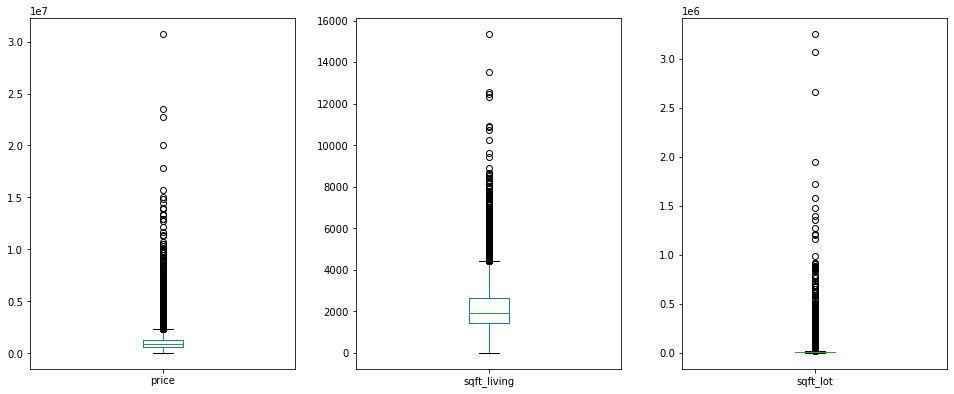

In [11]:
# Lots of outliers in price and lot sizes
fig, ax = plt.subplots(1,3,figsize = (14,6))
plt.tight_layout(pad = 3.0)
df.price.plot.box(ax = ax[0]);
df.sqft_living.plot.box(ax = ax[1]);
df.sqft_lot.plot.box(ax = ax[2]);

In [13]:
# Naively, define an acceptable upper bound for outliers of meaning as 3x standard boxplot maximum
max_outliers = (df.quantile(0.75) + (1.5 * (df.quantile(0.75) - df.quantile(0.25)))) * 3

categories_strip_max = ['price', 'sqft_living', 'sqft_lot']

# Drop entries above defined upper bound
df2 = df.copy()
max_outliers['price']
for category in categories_strip_max:
    df2 = df2.loc[df2[category] <= max_outliers[category]]

In [15]:
# Dropped around ~4.3% of data
(len(df2) - len(df))/(len(df))

-0.04282193468884781

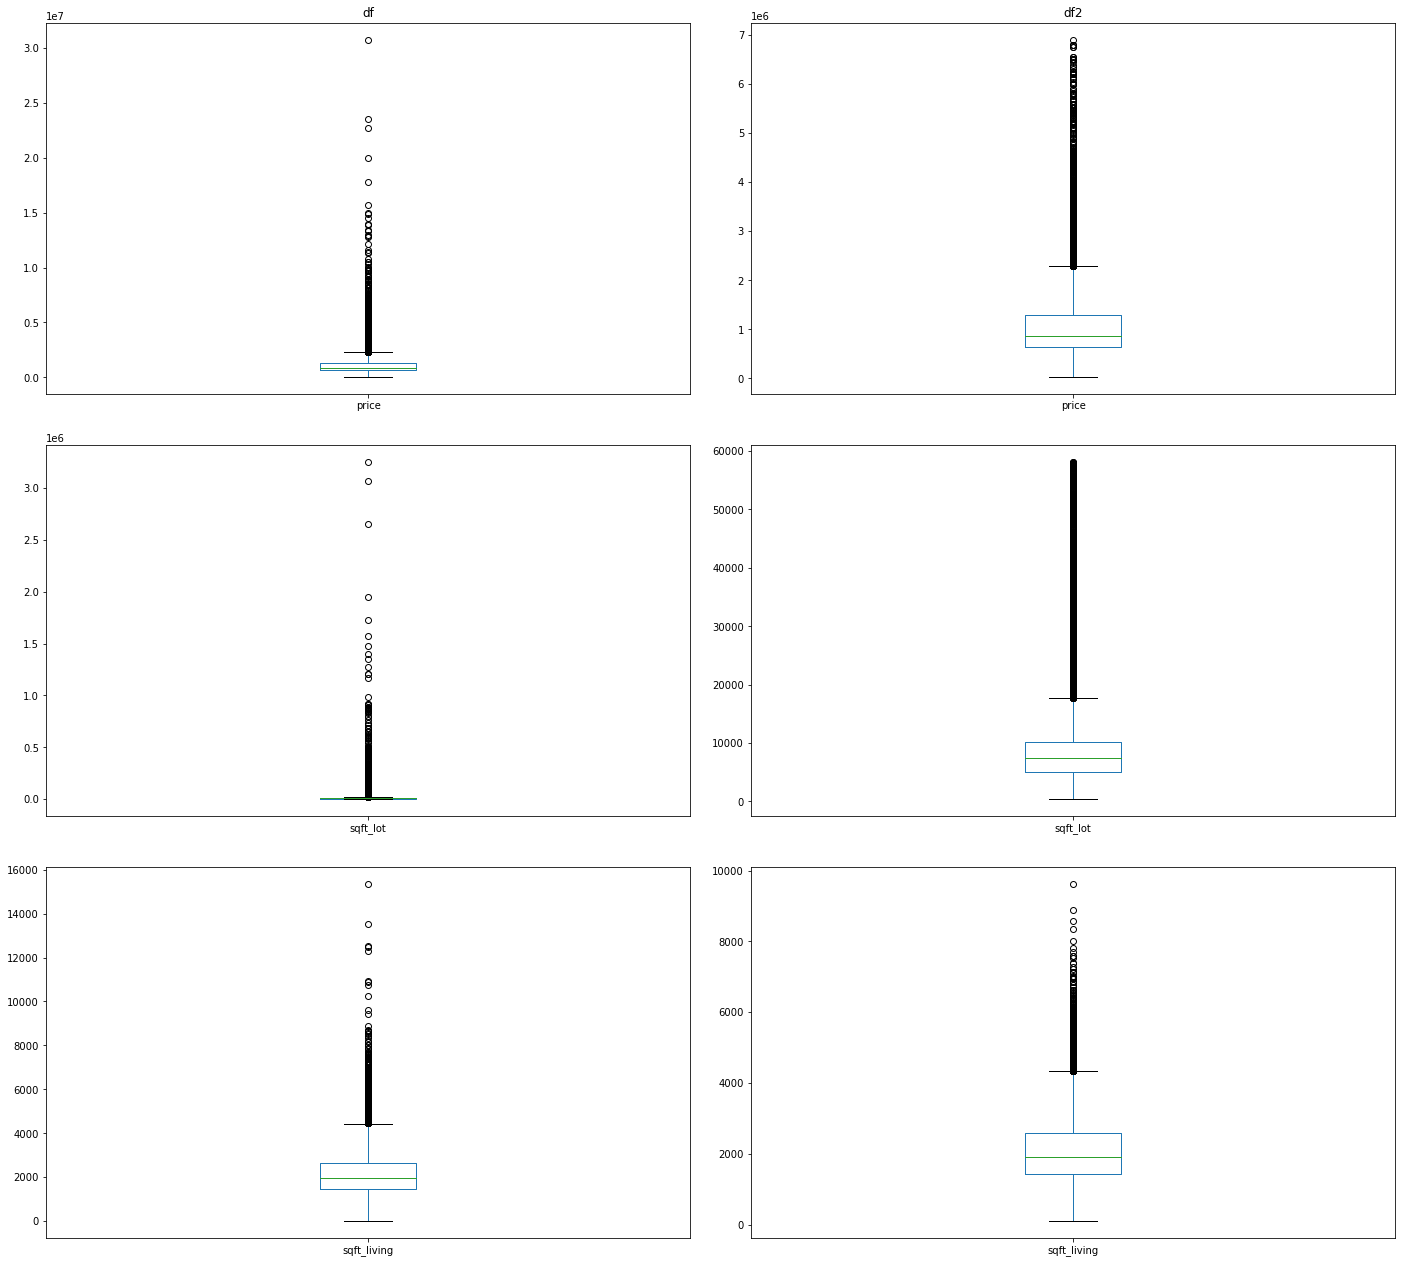

In [19]:
# Comparisons of previous and primary numerical categories
fig, ax = plt.subplots(3,2,figsize = (20,18))
plt.tight_layout(pad = 3.0)
ax[0][0].set_title('df')
ax[0][1].set_title('df2')
df.price.plot.box(ax = ax[0][0]);
df2.price.plot.box(ax = ax[0][1]);
df.sqft_lot.plot.box(ax = ax[1][0]);
df2.sqft_lot.plot.box(ax = ax[1][1]);
df.sqft_living.plot.box(ax = ax[2][0]);
df2.sqft_living.plot.box(ax = ax[2][1]);

In [20]:
# Analyze discrete numerical columns
print(df2.bathrooms.value_counts(), df2.bedrooms.value_counts(), df2.floors.value_counts(), sep = '\n\n')

2.5    7885
2.0    6689
1.0    4416
3.0    3903
3.5    2001
1.5    1708
4.0     593
4.5     468
5.0     120
5.5      83
6.0      34
0.0      30
6.5      15
7.5       6
7.0       6
0.5       5
9.5       1
Name: bathrooms, dtype: int64

3     11855
4      9070
2      3429
5      2648
6       461
1       334
7        76
0        39
8        34
9        14
10        2
11        1
Name: bedrooms, dtype: int64

1.0    13417
2.0    11184
1.5     2269
3.0      868
2.5      191
4.0       26
3.5        8
Name: floors, dtype: int64


In [21]:
# Create function to squash tiny outlier groups at extreme ends of discrete categories
def squash_groups(value, floor, ceiling):
    if value < floor:
        return floor
    elif value > ceiling:
        return ceiling
    return value

df3 = df2.copy()

df3.bathrooms = df3.bathrooms.apply(lambda x: squash_groups(x, 1.0, 6.0))
df3.bedrooms = df3.bedrooms.apply(lambda x: squash_groups(x, 1, 7))
df3.floors = df3.floors.apply(lambda x: squash_groups(x, 1.0, 3.0))

In [31]:
df3.columns

Index(['address', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'greenbelt',
       'nuisance', 'view', 'condition', 'grade', 'heat_source', 'sewer_system',
       'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'lat', 'long', 'zipcode'],
      dtype='object')

In [22]:
# Analyze categorical groups
print(df3.waterfront.value_counts(),
      df3.greenbelt.value_counts(),
      df3.nuisance.value_counts(),
      df3.view.value_counts(),
      df3.condition.value_counts(),
      df3.grade.value_counts(),
      df3.heat_source.value_counts(),
      df3.sewer_system.value_counts(), sep = '\n\n')

NO     27559
YES      404
Name: waterfront, dtype: int64

NO     27205
YES      758
Name: greenbelt, dtype: int64

NO     23208
YES     4755
Name: nuisance, dtype: int64

NONE         24778
AVERAGE       1744
GOOD           760
EXCELLENT      472
FAIR           209
Name: view, dtype: int64

Average      16880
Good          7689
Very Good     3137
Fair           204
Poor            53
Name: condition, dtype: int64

7 Average        11262
8 Good            8547
9 Better          3389
6 Low Average     2741
10 Very Good      1201
5 Fair             350
11 Excellent       329
12 Luxury           79
4 Low               43
3 Poor              11
13 Mansion           8
1 Cabin              2
2 Substandard        1
Name: grade, dtype: int64

Gas                  19568
Electricity           5448
Oil                   2765
Gas/Solar               89
Electricity/Solar       55
Other                   10
Oil/Solar                4
Name: heat_source, dtype: int64

PUBLIC                24696
PRIVAT

In [23]:
# Convert binary categorical columns to 0s and 1s
def convert_binary_column(value):
    if value.lower().strip() == 'no':
        return 0
    return 1

df4 = df3.copy()

df4.waterfront = df4.waterfront.apply(lambda x: convert_binary_column(x))
df4.greenbelt = df4.greenbelt.apply(lambda x: convert_binary_column(x))
df4.nuisance = df4.nuisance.apply(lambda x: convert_binary_column(x))

In [24]:
df4

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zipcode
0,7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,0,0,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055
1,8910500230,2021-12-13,920000.0,5,2.5,2770,6703,1.0,0,0,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133
2,1180000275,2021-09-29,311000.0,6,2.0,2880,6156,1.0,0,0,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178
3,1604601802,2021-12-14,775000.0,3,3.0,2160,1400,2.0,0,0,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118
4,8562780790,2021-08-24,592500.0,2,2.0,1120,758,2.0,0,0,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,2021-11-30,1555000.0,5,2.0,1910,4000,1.5,0,0,...,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103
30151,194000695,2021-06-16,1313000.0,3,2.0,2020,5800,2.0,0,0,...,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116
30152,7960100080,2022-05-27,800000.0,3,2.0,1620,3600,1.0,0,0,...,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122
30153,2781280080,2022-02-24,775000.0,3,2.5,2570,2889,2.0,0,0,...,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055


In [25]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27963 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             27963 non-null  int64         
 1   date           27963 non-null  datetime64[ns]
 2   price          27963 non-null  float64       
 3   bedrooms       27963 non-null  int64         
 4   bathrooms      27963 non-null  float64       
 5   sqft_living    27963 non-null  int64         
 6   sqft_lot       27963 non-null  int64         
 7   floors         27963 non-null  float64       
 8   waterfront     27963 non-null  int64         
 9   greenbelt      27963 non-null  int64         
 10  nuisance       27963 non-null  int64         
 11  view           27963 non-null  object        
 12  condition      27963 non-null  object        
 13  grade          27963 non-null  object        
 14  heat_source    27939 non-null  object        
 15  sewer_system   2795

In [27]:
df4.sewer_system.isna().sum()

11

In [28]:
df4.heat_source.isna().sum()

24

In [29]:
df4.heat_source.unique()

array(['Gas', 'Oil', 'Electricity', 'Gas/Solar', 'Electricity/Solar',
       'Other', nan, 'Oil/Solar'], dtype=object)

In [55]:
df5 = df4.copy()

# Convert nan heat sources into Other category, merge Oil/Solar into Other due to small sample size
df5.heat_source.fillna('Other', inplace = True)
df5.heat_source = df5.heat_source.apply(lambda x: x if x != 'Oil/Solar' else 'Other')

# Convert nan sewer system into PUBLIC, drop distinction between restricted/unrestricted
df5.sewer_system.fillna('PUBLIC', inplace = True)
df5.sewer_system = df5.sewer_system.apply(lambda x: x.split()[0])

# Select only numerical value from grade, then group 1-3 together and 12-13 together, recenter with 5 = average at middle
df5.grade = df5.grade.apply(lambda x: squash_groups(int(x.split()[0]), 3, 12) - 2)

In [56]:
df5.heat_source.value_counts()

Gas                  19568
Electricity           5448
Oil                   2765
Gas/Solar               89
Electricity/Solar       55
Other                   38
Name: heat_source, dtype: int64

In [57]:
df5.sewer_system.value_counts()

PUBLIC     24709
PRIVATE     3254
Name: sewer_system, dtype: int64

In [58]:
df5.grade.value_counts()

5     11262
6      8547
7      3389
4      2741
8      1201
3       350
9       329
10       87
2        43
1        14
Name: grade, dtype: int64